# **RECOMMENDATION SYSTEM**

Creation of a simple recommendation system that suggests items to users based on their preferences. Techniques like collaborative filtering or content-based filtering has been used to recommend movies, books, or products to users.

**Load Datasets**

The project starts by importing the necessary libraries (e.g., Pandas) and loading two datasets, **movies** and **ratings**, from CSV files.

*   movies - Contains a unique **movieId**, **title** and the respective **genres**
*   ratings - Contains a unique **userId**, **movieId** referred from **movies** dataset, **ratings**, respective **timestamps** at which the **rating** has been provided

In [ ]:
import pandas as pd
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

#Movies Dataset

The **movies** dataset is explored using methods like head(), info(), and nunique() to gain an understanding of the data's structure and the presence of null values.

In [ ]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


No null values in **movies** dataset

In [ ]:
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

There should be only one title corresponding to a movieId, which means number of unique movieId = number of unique title, which tells us that there must be duplicates in our dataset

In [ ]:
movies = movies.drop_duplicates(subset = 'title')

In [ ]:
movies.nunique()

movieId    9737
title      9737
genres      951
dtype: int64

After dropping duplicates, number of unique movieId = number of unique title

In [ ]:
movies['genre_list'] = movies['genres'].str.split('|')

In [ ]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                          genre_list  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]

Creating set of various genres



In [ ]:
set_of_genres = set()

for i in movies['genre_list']:
  for j in i:
      set_of_genres.add(j)

print(set_of_genres)

{'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Drama', 'Comedy', 'Western', 'IMAX', 'Animation', 'Sci-Fi', '(no genres listed)', 'Horror', 'War', 'Film-Noir', 'Fantasy', 'Children', 'Musical', 'Documentary', 'Adventure'}


Find number of rows where the value is **no genres listed**

In [ ]:
len(movies[movies['genres'] == '(no genres listed)'])

34

Since the number of such rows is very small compared to the size of dataset, hence removing those rows

In [ ]:
movies = movies[movies['genres'] != '(no genres listed)']

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9703 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieId     9703 non-null   int64 
 1   title       9703 non-null   object
 2   genres      9703 non-null   object
 3   genre_list  9703 non-null   object
dtypes: int64(1), object(3)
memory usage: 379.0+ KB


In [ ]:
set_of_genres.remove('(no genres listed)')
print(set_of_genres)

{'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Drama', 'Comedy', 'Western', 'IMAX', 'Animation', 'Sci-Fi', 'Horror', 'War', 'Film-Noir', 'Fantasy', 'Children', 'Musical', 'Documentary', 'Adventure'}


#Ratings Dataset

In [ ]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


No null values in **ratings** dataset

In [ ]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

The **ratings** dataset is visualized using a box plot to identify the presence of outliers.

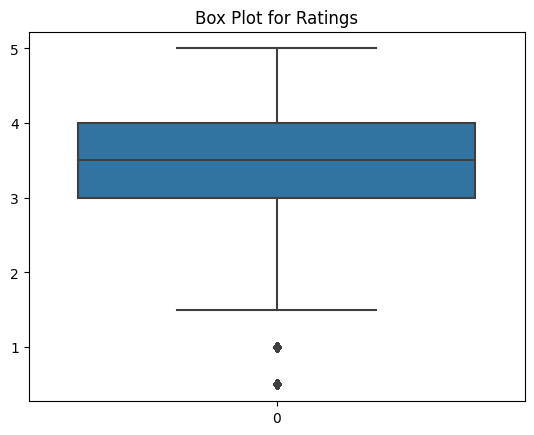

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot using Seaborn
sns.boxplot(ratings['rating'])

# Add a title
plt.title('Box Plot for Ratings')

# Display the plot
plt.show()

Boxplot for **rating** shows presence of outliers

In [ ]:
rating_summary = ratings['rating'].describe()
rating_summary

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Finding the lower whisker end

lower_whisker_end = q1 - 1.5 * iqr

iqr = q3 - q1

In [ ]:
lower_whisker_end = rating_summary['25%'] - 1.5 * (rating_summary['75%'] - rating_summary['25%'])
lower_whisker_end

1.5

Removing outliers

In [ ]:
ratings = ratings[ratings['rating'] >= lower_whisker_end]

In [ ]:
ratings['rating'].describe()

count    96655.000000
mean         3.616854
std          0.900495
min          1.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

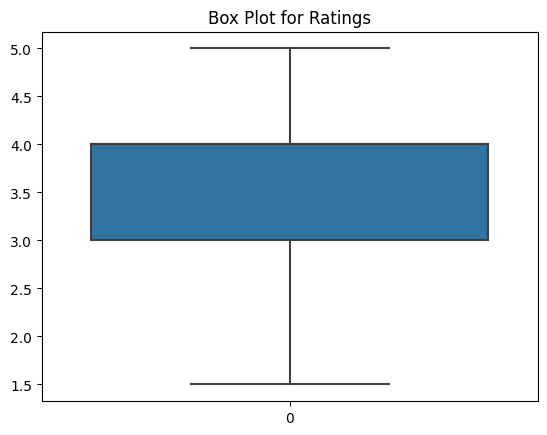

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot using Seaborn
sns.boxplot(ratings['rating'])

# Add a title
plt.title('Box Plot for Ratings')

# Display the plot
plt.show()

Resulting dataset doesn't contain outliers

In [ ]:
ratings.nunique()

userId         610
movieId       9477
rating           8
timestamp    81890
dtype: int64

In [ ]:
ratings.groupby('movieId')['userId'].count()

movieId
1         214
2         108
3          48
4           6
5          48
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9477, dtype: int64

#User-User Correlation
User-User Collaborative Filtering is implemented to provide movie recommendations based on movies watched by similar users.

In [ ]:
# Get unique values from the 'userId' column
unique_users = ratings['userId'].unique()

# Display the unique users
print(unique_users)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [ ]:
# Get unique values from the 'movieId' column
unique_movies = ratings['movieId'].unique()

# Display the unique movies
print(unique_movies)

[     1      3      6 ... 160836 163937 163981]


In [ ]:
# Create a new DataFrame with unique values from 'userId'
unique_users = pd.DataFrame({'uniqueUsers': unique_users})
unique_users

uniqueUsers
0              1
1              2
2              3
3              4
4              5
..           ...
605          606
606          607
607          608
608          609
609          610

[610 rows x 1 columns]

In [ ]:
# Create a new DataFrame with unique values from 'movieId'
unique_movies = pd.DataFrame({'uniqueMovies': unique_movies})
unique_movies

uniqueMovies
0                1
1                3
2                6
3               47
4               50
...            ...
9472        160341
9473        160527
9474        160836
9475        163937
9476        163981

[9477 rows x 1 columns]

In [ ]:
# Create a crosstab between 'users' and 'movies' with values from 'rating'
crosstab = pd.crosstab(ratings['movieId'], ratings['userId'], values = ratings['rating'], aggfunc = 'mean')

crosstab = crosstab.fillna(0)

# Display the crosstab
crosstab

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193583   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193585   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193587   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193609   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  
193581   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
193583   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
193585   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
193587   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
193609   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[9477 rows x 610 columns]

In [ ]:
# Function to find similar users for a given user
def find_similar_users(user_id, num_users = 5):
    user_ratings = crosstab[user_id]
    similar_users = crosstab.corrwith(user_ratings).sort_values(ascending=False)
    similar_users = similar_users.dropna()
    similar_users = similar_users.index.difference([user_id])  # Exclude the user itself
    return similar_users[:num_users]

In [ ]:
# Function to generate recommendations for a user based on similar users
def user_user_collaborative_filtering(user_id, num_recommendations = 5):
    similar_users = find_similar_users(user_id)
    user_ratings = crosstab[user_id]
    recommendations = crosstab[similar_users].mean(axis=1).sort_values(ascending=False)
    recommendations = recommendations.dropna()
    recommendations = recommendations[~recommendations.index.isin(user_ratings[user_ratings > 0].index)]
    return recommendations[:num_recommendations]

In [ ]:
import random

for i in range(5):
  user_id = random.randint(ratings['userId'].min(), ratings['userId'].max())
  recommendations = pd.DataFrame(user_user_collaborative_filtering(user_id))
  recommendations = recommendations.rename(columns = {0: 'avg_rating'})
  print(f"Recommendations for userId {user_id}:\n{recommendations}")
  print("\n")

Recommendations for userId 469:
         avg_rating
movieId            
1282            2.0
3703            2.0
596             2.0
475             2.0
2692            2.0


Recommendations for userId 265:
         avg_rating
movieId            
457             2.8
1282            2.0
3703            2.0
596             2.0
919             2.0


Recommendations for userId 322:
         avg_rating
movieId            
457             2.8
260             2.0
1282            2.0
3703            2.0
1196            2.0


Recommendations for userId 230:
         avg_rating
movieId            
457             2.8
608             2.6
260             2.0
2858            2.0
1282            2.0


Recommendations for userId 278:
         avg_rating
movieId            
457             2.8
608             2.6
260             2.0
2858            2.0
1282            2.0




The final step involves merging the recommended movies with the **movies** dataset to display movie titles instead of movie IDs.

In [ ]:
#Now user will be interested in the movie title instead of the movieId

# Merge the two DataFrames on the 'movieId' column
recommended_movies = recommendations.merge(movies, on='movieId', how='left')

# Display the result DataFrame with movie titles
recommended_movies[['title', 'avg_rating']]

recommended_movies = recommended_movies.set_index('title')
recommended_movies[['avg_rating']]

avg_rating
title                                                
Fugitive, The (1993)                              2.8
Fargo (1996)                                      2.6
Star Wars: Episode IV - A New Hope (1977)         2.0
American Beauty (1999)                            2.0
Fantasia (1940)                                   2.0